<a href="https://colab.research.google.com/github/WaithiraHawi/Customer_Lifetime_Value/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/CLV.xlsx"
df = pd.read_excel(file_path)

print(df.head())
print(df.info())
print(df.describe())

   Customer ID  Age  Gender  Income  Purchase_Frequency  \
0            1   35       0   50000                  10   
1            2   45       1   75000                   8   
2            3   28       0   40000                  12   
3            4   50       0   80000                   6   
4            5   40       1   60000                   9   

   Average_Purchase_Amount  Membership_Tenure  Website_Visits_per_Month   CLV  \
0                       50                  2                        20  1000   
1                       70                  3                        25  1200   
2                       40                  1                        15   800   
3                      100                  5                        30  1500   
4                       60                  4                        22  1100   

   Unnamed: 9  Unnamed: 10      Unnamed: 11  
0         NaN          NaN              NaN  
1         NaN          NaN              NaN  
2         NaN       

In [5]:
# Dropping empty
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

df.head()

,Customer ID,Age,Gender,Income,Purchase_Frequency,Average_Purchase_Amount,Membership_Tenure,Website_Visits_per_Month,CLV
0,1,35,0,50000,10,50,2,20,1000
1,2,45,1,75000,8,70,3,25,1200
2,3,28,0,40000,12,40,1,15,800
3,4,50,0,80000,6,100,5,30,1500
4,5,40,1,60000,9,60,4,22,1100


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/13dqCdEP83RNRhWQkyoh57cZ_-Bo5ulKIP3CxSiA-Me8/edit#gid=0


In [6]:
df['Calculated_CLV'] = (
    df['Average_Purchase_Amount'] *
    df['Purchase_Frequency'] *
    df['Membership_Tenure']
)

df[['Customer ID', 'Calculated_CLV', 'CLV']].head()

,Customer ID,Calculated_CLV,CLV
0,1,1000,1000
1,2,1680,1200
2,3,480,800
3,4,3000,1500
4,5,2160,1100


from matplotlib import pyplot as plt
_df_0['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Calculated_CLV'].plot(kind='hist', bins=20, title='Calculated_CLV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CLV'].plot(kind='hist', bins=20, title='CLV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Customer ID', y='Calculated_CLV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Calculated_CLV', y='CLV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Calculated_CLV']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Calculated_CLV')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['CLV']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('CLV')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Customer ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Customer ID'}, axis=1)
              .sort_values('Customer ID', ascending=True))
  xs = counted['Customer ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Calculated_CLV'].plot(kind='line', figsize=(8, 4), title='Calculated_CLV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CLV'].plot(kind='line', figsize=(8, 4), title='CLV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
def calculate_clv_pipeline(df,
                           freq_col='Purchase_Frequency',
                           amount_col='Average_Purchase_Amount',
                           tenure_col='Membership_Tenure'):
    """
    Calculate CLV for each customer and return enriched DataFrame.
    """
    df = df.copy()
    df['Calculated_CLV'] = df[amount_col] * df[freq_col] * df[tenure_col]
    df['CLV_Rank'] = df['Calculated_CLV'].rank(ascending=False)
    return df.sort_values('Calculated_CLV', ascending=False)

# Applying the pipeline
clv_pipeline_results = calculate_clv_pipeline(df)
clv_pipeline_results.head()

,Customer ID,Age,Gender,Income,Purchase_Frequency,Average_Purchase_Amount,Membership_Tenure,Website_Visits_per_Month,CLV,Calculated_CLV,CLV_Rank
18,19,58,0,95000,4,110,7,38,1800,3080,1.5
38,39,57,0,92000,4,110,7,38,1800,3080,1.5
32,33,50,0,80000,6,100,5,30,1500,3000,5.0
3,4,50,0,80000,6,100,5,30,1500,3000,5.0
71,72,58,1,90000,5,100,6,35,1750,3000,5.0


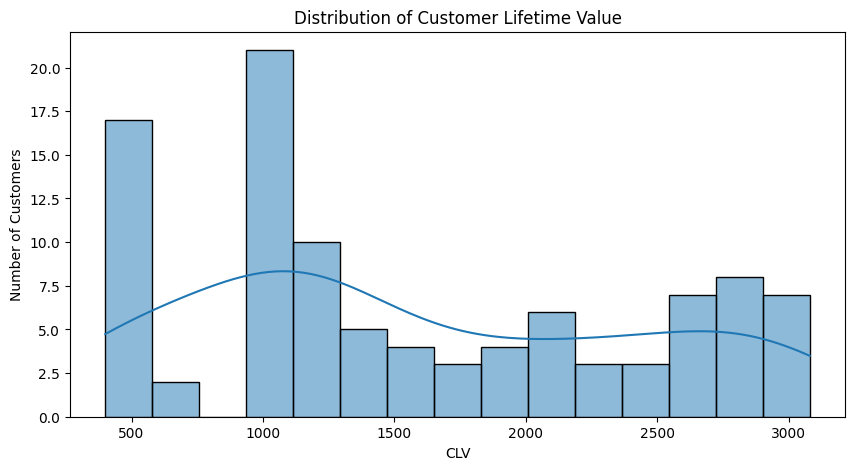

/tmp/ipython-input-3675426218.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLV_Segment', order=['Low', 'Medium', 'High'], palette='viridis')


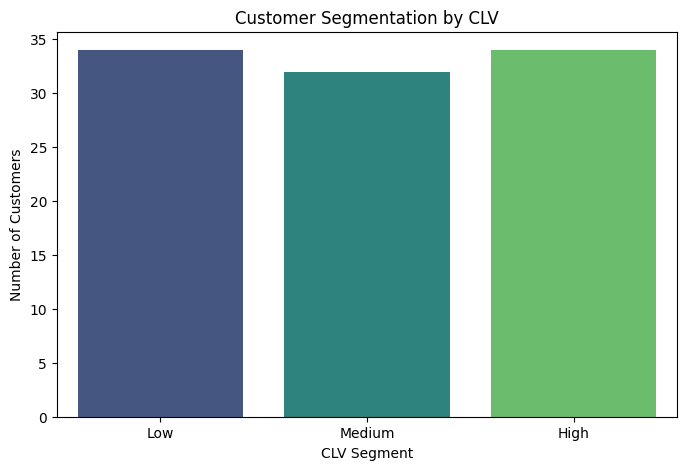

,Customer ID,Calculated_CLV,CLV_Segment
0,1,1000,Low
1,2,1680,Medium
2,3,480,Low
3,4,3000,High
4,5,2160,High


from matplotlib import pyplot as plt
_df_11['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Calculated_CLV'].plot(kind='hist', bins=20, title='Calculated_CLV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Customer ID', y='Calculated_CLV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Calculated_CLV']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Calculated_CLV')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Customer ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Customer ID'}, axis=1)
              .sort_values('Customer ID', ascending=True))
  xs = counted['Customer ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Calculated_CLV'].plot(kind='line', figsize=(8, 4), title='Calculated_CLV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating CLV again for consistency
df['Calculated_CLV'] = (
    df['Average_Purchase_Amount'] *
    df['Purchase_Frequency'] *
    df['Membership_Tenure']
)

# Segmenting customers by CLV (High, Medium, Low)
# We'll use quantiles for segmentation
df['CLV_Segment'] = pd.qcut(df['Calculated_CLV'], q=3, labels=['Low', 'Medium', 'High'])

# Visualizing CLV distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Calculated_CLV'], bins=15, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.show()

# Visualizing CLV Segmentation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CLV_Segment', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Customer Segmentation by CLV')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()

# Segmented data preview
df[['Customer ID', 'Calculated_CLV', 'CLV_Segment']].head()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def clv_pipeline_export(df,
                        freq_col='Purchase_Frequency',
                        amount_col='Average_Purchase_Amount',
                        tenure_col='Membership_Tenure',
                        customer_col='Customer ID',
                        output_dir='clv_output'):
    """
    Automated CLV pipeline:
    1. Calculate CLV
    2. Segment customers
    3. Visualize CLV
    4. Export results and plots
    """

    # Creating the output directory
    os.makedirs(output_dir, exist_ok=True)

    # Calculating CLV
    df = df.copy()
    df['Calculated_CLV'] = df[amount_col] * df[freq_col] * df[tenure_col]

    # Segmenting CLV into Low, Medium, High (quantiles)
    df['CLV_Segment'] = pd.qcut(df['Calculated_CLV'], q=3, labels=['Low', 'Medium', 'High'])

    # Visualizations
    # CLV Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Calculated_CLV'], bins=15, kde=True)
    plt.title('Distribution of Customer Lifetime Value')
    plt.xlabel('CLV')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/clv_distribution.png')
    plt.close()

    # Segmentation Count Plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='CLV_Segment', order=['Low', 'Medium', 'High'], palette='viridis')
    plt.title('Customer Segmentation by CLV')
    plt.xlabel('CLV Segment')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/clv_segmentation.png')
    plt.close()

    # Exporting results
    output_file = f'{output_dir}/CLV_Segmented_Customers.xlsx'
    df[[customer_col, 'Calculated_CLV', 'CLV_Segment']].to_excel(output_file, index=False)

    print(f"Pipeline complete! Results saved to: {output_file}")
    print(f"Plots saved in: {output_dir}/")

    return df

# Pipeline
exported_df = clv_pipeline_export(df)
exported_df.head()

/tmp/ipython-input-3819509265.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLV_Segment', order=['Low', 'Medium', 'High'], palette='viridis')


Pipeline complete! Results saved to: clv_output/CLV_Segmented_Customers.xlsx
Plots saved in: clv_output/


,Customer ID,Age,Gender,Income,Purchase_Frequency,Average_Purchase_Amount,Membership_Tenure,Website_Visits_per_Month,CLV,Calculated_CLV,CLV_Segment
0,1,35,0,50000,10,50,2,20,1000,1000,Low
1,2,45,1,75000,8,70,3,25,1200,1680,Medium
2,3,28,0,40000,12,40,1,15,800,480,Low
3,4,50,0,80000,6,100,5,30,1500,3000,High
4,5,40,1,60000,9,60,4,22,1100,2160,High


from matplotlib import pyplot as plt
_df_18['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Customer ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Gender', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Income', y='Purchase_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Purchase_Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Purchase_Frequency')

from matplotlib import pyplot as plt
_df_30['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)